# Working with Real Data
When you are learning about machine learning, it is best to experiment with realworld
data, not artificial datasets. Fortunately, there are thousands of open datasets to
choose from, ranging across all sorts of domains. Here are a few places you can look
to get data:

- OpenML.org
- Kaggle.com
- PapersWithCode.com
- UC Irvine Machine Learning Repository
- Amazon’s AWS datasets
- TensorFlow datasets
- DataPortals.org
- OpenDataMonitor.eu
- Wikipedia’s list of machine learning datasets
- Quora.com
- The datasets subreddit

# Machine Learning Project Checklist
This checklist can guide you through your machine learning projects. There are eight
main steps:
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning
algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Obviously, you should feel free to adapt this checklist to your needs.

A typical performance measure
for regression problems is the root mean square error (RMSE). It gives an idea of how
much error the system typically makes in its predictions, with a higher weight given
to large errors.
# Root Mean Square Error
$$
\text{RMSE} = \sqrt{\frac{1}{m} \sum_{i=1}^n (h(x_i) - \hat{y}_i)^2}
$$

- m is the number of instances in the dataset
- h is your system’s prediction function, also called a hypothesis, also called “y-hat”

RMSE(X,h) is the cost function measured on the set of examples using your
hypothesis h.

- Computing the root of a sum of squares (RMSE) corresponds to the Euclidean
norm: this is the notion of distance we are all familiar with. It is also called the $ℓ_2$
norm, noted $∥ · ∥_2$ (or just $∥ · ∥$).
- Computing the sum of absolutes (MAE) corresponds to the $ℓ_1 norm, noted ∥ · ∥_1.$
This is sometimes called the Manhattan norm because it measures the distance
between two points in a city if you can only travel along orthogonal city blocks.
- More generally, the $ℓ_k$ norm of a vector v containing n elements is defined as
$∥v∥_k$$ = (|v_1|_k + |v_2|_k + ... + |v_n|_k)^\frac{1}{k}.$

$ℓ_0$ gives the number of nonzero elements in the
vector, and ℓ∞ gives the maximum absolute value in the vector.

When calculating L2 or L1 norm, replace the v vector with the e vector (the error -> so you should have the minus sign there!)


The higher the norm index, the more it focuses on large values and neglects small
ones. This is why the RMSE is more sensitive to outliers than the MAE. But when
outliers are exponentially rare (like in a bell-shaped curve), the RMSE performs very
well and is generally preferred.

Use RMSE:

When errors are expected to follow a bell-shaped distribution (Gaussian).

When large errors are rare but should be heavily penalized.

When you need a smooth and differentiable loss function for optimization.

Use MAE:

When errors may contain outliers or follow a distribution with heavy tails.

When you want a robust metric that is less sensitive to extreme values.

When interpretability is important (MAE is easier to explain since it’s in the same units as the data).



# Downloading the data

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

#pathlib.Path: Used for handling file paths in a platform-independent way.
#pandas: Used for data manipulation and analysis (loading the dataset into a DataFrame).
#tarfile: Used for extracting files from a .tgz (tar.gz) archive.
#urllib.request: Used for downloading files from the internet.


def load_housing_data():
  """
  This function is responsible for:

  Checking if the dataset already exists locally.
  Downloading the dataset if it doesn’t exist.
  Extracting the dataset from the .tgz archive.
  Loading the dataset into a Pandas DataFrame.
  """
  tarball_path = Path('datasets/housing.tgz') #tarball_path is the path where the downloaded .tgz file will be saved.
  if not tarball_path.is_file(): #If the file does not exist, the script proceeds to download it.
    Path('datasets').mkdir(parents = True, exist_ok=True)
    #If the datasets directory does not exist, it creates it.
    #parents=True: Ensures that any missing parent directories are also created.
    #exist_ok=True: Prevents an error if the directory already exists.

    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)

    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path='datasets')
  return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()


In [2]:
#read the first 5 rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


total_bedrooms attribute has only 20,433 non-null values, meaning that 207 districts
are missing this feature.

In [4]:
#Checking the values of ocean_proximity
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

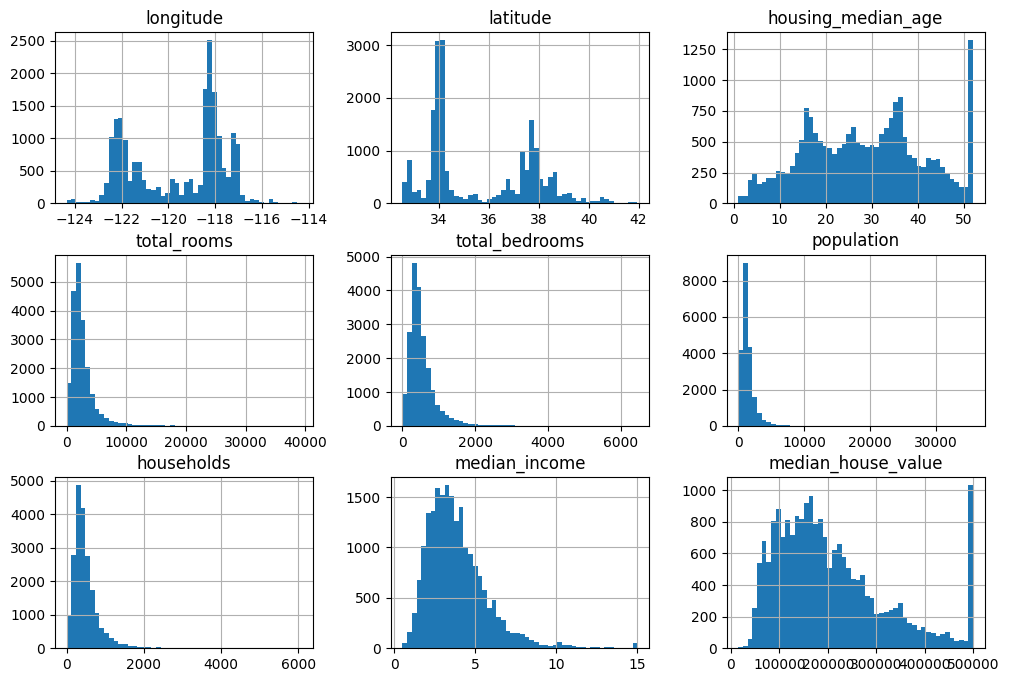

In [6]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(12,8))

# Shuffling and splitting data


In [7]:
import numpy as np
def shuffle_and_split_data(data, test_ratio):
  '''
  Example:
  # Sample DataFrame with 6 rows
  data = pd.DataFrame({"values": [10, 20, 30, 40, 50, 60]})

  # Step 1: Shuffle indices
  shuffled_indices = np.random.permutation(len(data))  # e.g., [2, 5, 1, 3, 0, 4]

  # Step 2: Split into train/test indices (e.g., 80% train, 20% test)
  train_indices = shuffled_indices[:4]  # First 4 shuffled indices: [2, 5, 1, 3]
  test_indices = shuffled_indices[4:]   # Last 2 shuffled indices: [0, 4]

  # Step 3: Extract subsets using .iloc
  train_set = data.iloc[train_indices]
  test_set = data.iloc[test_indices]
  '''
  shuffled_indices = np.random.permutation(len(data)) #It generates an array of integers from 0 to n-1 in a random order.
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]

  return data.iloc[train_indices], data.iloc[test_indices]





In [8]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [9]:
len(train_set)

16512

In [10]:
len(test_set)

4128

Well, this works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, you (or your machine learning algorithms) will get to see
the whole dataset, which is what you want to avoid.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
  return ( crc32(np.int64(identifier)) <test_ratio * 2 **32)


def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]

  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]



In [12]:
housing_with_id = housing.reset_index()


In [13]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [14]:
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

Key Differences Between the Two Functions

<br></br>
**shuffle_and_split_data:**

How it works:

Randomly permutes (shuffles) the dataset indices using np.random.permutation.
Splits the shuffled indices into training and test sets based on the specified test ratio.

Shuffling:

The shuffling ensures that rows are randomly distributed between the training and test sets.

<br></br>
**split_data_with_id_hash:**

How it works:

Assigns each row to the training or test set based on a deterministic hash of an identifier column (e.g., row index or unique ID).

No Explicit Shuffling:
It doesn't explicitly shuffle rows or use random indices.

Deterministic Assignment:
The crc32 hash function ensures that rows are consistently split based on their identifiers, regardless of their order in the dataset.
Why split_data_with_id_hash Doesn’t Need Shuffling
Shuffling is typically done to avoid patterns in the dataset affecting the split (e.g., sorted rows). However, the hash-based approach achieves the same goal through a deterministic yet pseudo-random hash function.

Here’s how:

Hash-Based Splitting Simulates Randomness:

The crc32 hash function generates a seemingly random integer for each identifier.
Rows are assigned to the test set if their hash value falls within a specific range (< test_ratio * 2**32).

Order-Independent:

The hash function ensures that the assignment is independent of the row's position in the dataset. This mimics the randomness of shuffling.
Deterministic Split:

Unlike shuffling, which is random each time unless you set a seed, hash-based splitting ensures that the same rows always end up in the same set, making it reproducible.
Code Comparison
shuffle_and_split_data:

<br></br>

**Advantages of split_data_with_id_hash Over Shuffling**

Reproducibility:
The hash function ensures the split is always the same for a given dataset, identifier, and test ratio.
This is crucial when you want consistent results across multiple experiments or datasets.

Handles Updates to the Dataset:

If new rows are added to the dataset (with new unique IDs), they can be assigned to training or test sets without re-splitting the entire dataset.

Avoids Explicit Randomization:

The hash function provides pseudo-random behavior without requiring a random seed.


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [16]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0.,1.5,3.0,4.5,6.0, np.inf],
                               labels = [1, 2, 3, 4, 5])

In [17]:
housing['income_cat']

,income_cat
0,5
1,5
2,5
3,4
4,3
...,...
20635,2
20636,2
20637,2
20638,2


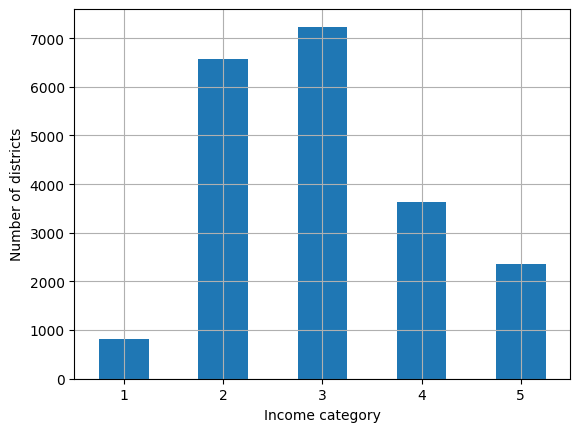

In [18]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

Scikit-
Learn provides a number of splitter classes in the sklearn.model_selection package
that implement various strategies to split your dataset into a training set and a test set.
Each splitter has a split() method that returns an iterator over different training/
test splits of the same data.

the split() method yields the training and test indices, not the
data itself. Having multiple splits can be useful if you want to better estimate the
performance of your model

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit
"""
This imports the StratifiedShuffleSplit class from sklearn.model_selection, which is used to split a dataset while preserving the distribution of a target variable.
"""

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
"""
n_splits=10: The dataset will be split 10 times into training and test sets.
test_size=0.2: 20% of the dataset will be allocated to the test set.
random_state=42: Ensures reproducibility.
"""
strat_splits = []

for train_index, test_index in splitter.split(housing, housing['income_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])


For now, you can just use the first split:

In [20]:
strat_train_set, strat_test_set = strat_splits[0]

Or, since stratified sampling is fairly common, there’s a shorter way to get a single
split using the train_test_split() function with the stratify argument:

In [21]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [22]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


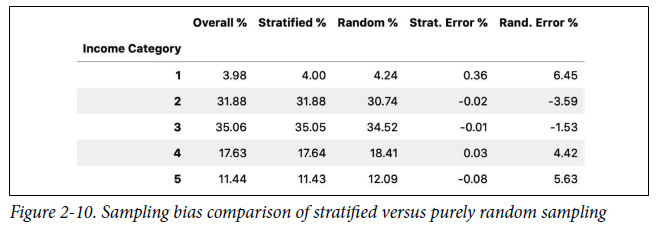

You won’t use the income_cat column again, so you might as well drop it.

In [23]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

In [24]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY


In [25]:
housing = strat_train_set.copy()



## Visualizing Geographical Data

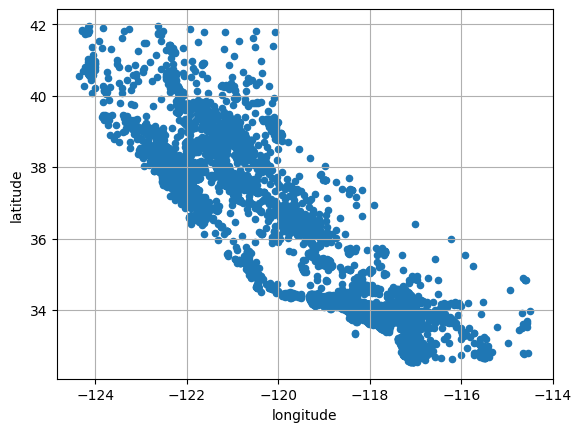

In [26]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
plt.show()

Setting the alpha option to 0.2 makes it much easier to visualize the places
where there is a high density of data points

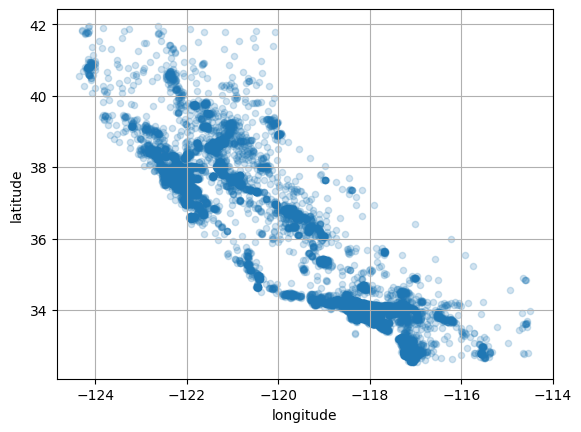

In [27]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()

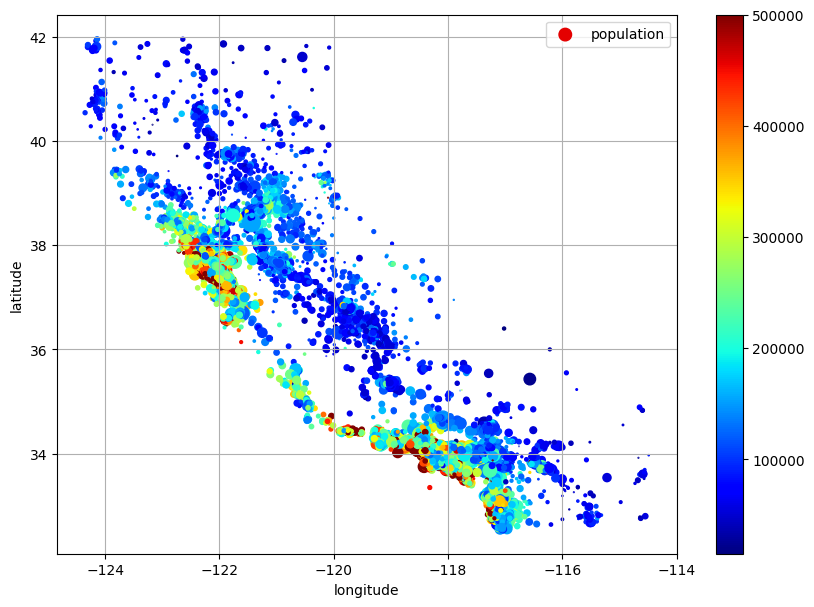

In [28]:
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True, s=housing['population']/100,
             label='population', c=housing['median_house_value'], cmap='jet', colorbar=True, legend=True,
             sharex=False, figsize=(10,7))

plt.show()

### Look for Correlations

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method:

In [29]:
housing["ocean_proximity"] = housing["ocean_proximity"].astype("category").cat.codes


In [30]:
housing["ocean_proximity"]

,ocean_proximity
13096,3
14973,0
3785,1
14689,1
20507,4
...,...
14207,0
13105,1
19301,4
19121,0


In [31]:
corr_matrix = housing.corr()

In [32]:
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
ocean_proximity,0.081913
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


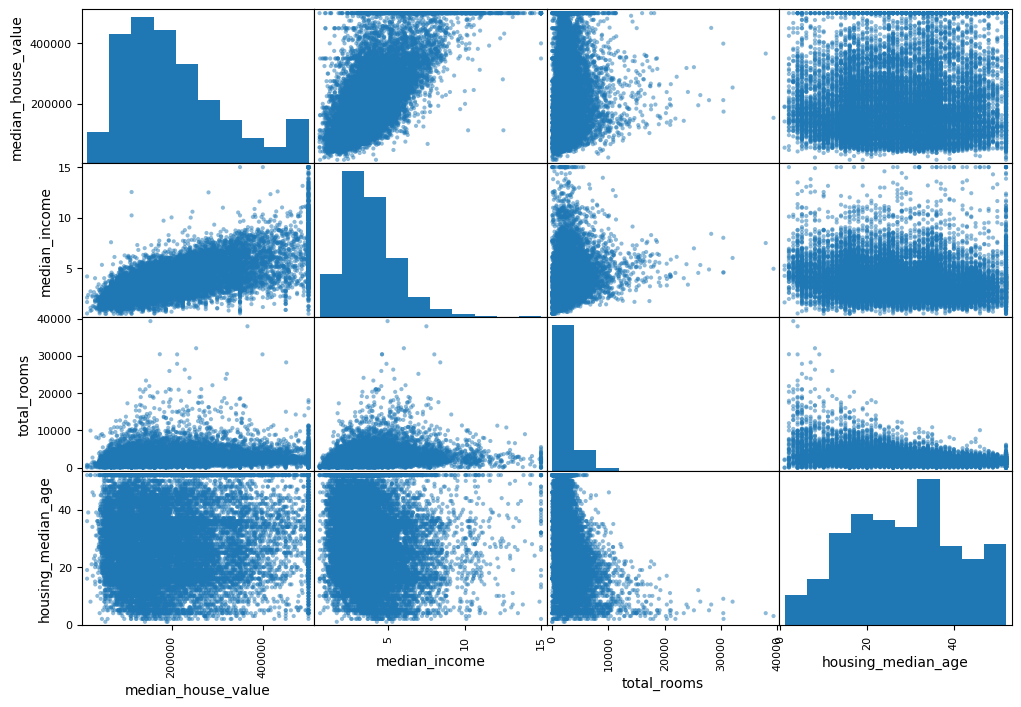

In [33]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

This scatter matrix plots every numerical attribute against every other
numerical attribute, plus a histogram of each numerical attribute’s values on the main
diagonal (top left to bottom right)

The main diagonal would be full of straight lines if Pandas plotted each variable
against itself, which would not be very useful. So instead, the Pandas displays a histogram
of each attribute (other options are available; see the Pandas documentation for
more details).

Looking at the correlation scatterplots, it seems like the most promising attribute
to predict the median house value is the median income, so you zoom in on their
scatterplot

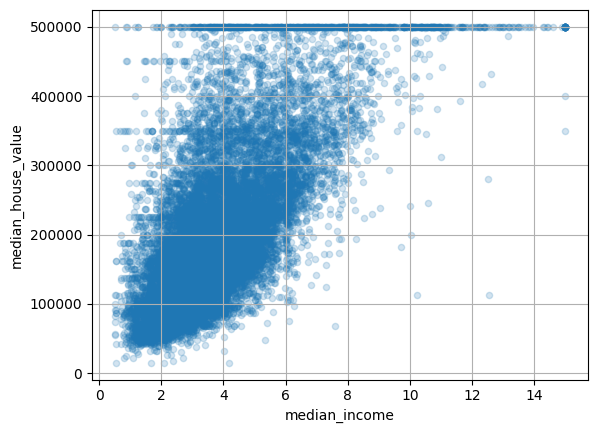

In [34]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, grid=True)

plt.show()

One last thing you may want to do before preparing the data for machine learning
algorithms is to try out various attribute combinations. For example, the total number
of rooms in a district is not very useful if you don’t know how many households
there are. What you really want is the number of rooms per household. Similarly,
the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems
like an interesting attribute combination to look at. You create these new attributes as
follows:

In [35]:
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [36]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,3,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,0,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,1,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,1,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,4,3.725256,0.277371,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,500001.0,0,4.277247,0.266875,1.793499
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,88800.0,1,5.535714,0.201019,2.667293
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,148800.0,4,5.157895,0.197704,3.702632
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,500001.0,0,4.511933,0.230891,2.058473


In [37]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
ocean_proximity,0.081913
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224


## Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your machine learning algorithms. Instead of doing
this manually, you should write functions for this purpose, for several good reasons:

• This will allow you to reproduce these transformations easily on any dataset (e.g.,
the next time you get a fresh dataset).

• You will gradually build a library of transformation functions that you can reuse
in future projects.

first, revert to a clean training set (by copying strat_train_set once again). You
should also separate the predictors and the labels, since you don’t necessarily want
to apply the same transformations to the predictors and the target values (note that
drop() creates a copy of the data and does not affect strat_train_set):

In [38]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [39]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN


### Clean the Data

Most machine learning algorithms cannot work with missing features, so you’ll need
to take care of these. For example, you noticed earlier that the total_bedrooms
attribute has some missing values. You have three options to fix this:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the missing values to some value (zero, the mean, the median, etc.). This is
called imputation.
You can accomplish these easily using the Pandas DataFrame’s dropna(), drop(), and
fillna() methods:

In [40]:
#housing.dropna(subset=["total_bedrooms"], inplace=True) # option 1
#housing.drop("total_bedrooms", axis=1) # option 2
#median = housing['total_bedrooms'].median() # option 3 (least destructive)
#housing['total_bedrooms'].fillna(median, inplace=True)

You decide to go for option 3 since it is the least destructive, but instead of the
preceding code, you will use a handy Scikit-Learn class: SimpleImputer. The benefit
is that it will store the median value of each feature: this will make it possible to
impute missing values not only on the training set, but also on the validation set,
the test set, and any new data fed to the model. To use it, first you need to create a
SimpleImputer instance, specifying that you want to replace each attribute’s missing
values with the median of that attribute

### SimpleImputer

In [41]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

Since the median can only be computed on numerical attributes, you then need to
create a copy of the data with only the numerical attributes (this will exclude the text
attribute ocean_proximity):

In [42]:
housing_num = housing.select_dtypes(include=[np.number])

Now you can fit the imputer instance to the training data using the fit() method:

In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result
in its statistics_ instance variable. Only the total_bedrooms attribute had missing
values, but you cannot be sure that there won’t be any missing values in new data
after the system goes live, so it is safer to apply the imputer to all the numerical
attributes

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [45]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now you can use this “trained” imputer to transform the training set by replacing
missing values with the learned medians

In [46]:
X = imputer.transform(housing_num)

Missing values can also be replaced with the mean value (strategy="mean"), or
with the most frequent value (strategy="most_frequent"), or with a constant
value (strategy="constant", fill_value=…). The last two strategies support nonnumerical
data.

There are also more powerful imputers available in the
sklearn.impute package (both for numerical features only):

• KNNImputer replaces each missing value with the mean of the
k-nearest neighbors’ values for that feature. The distance is
based on all the available features.

• IterativeImputer trains a regression model per feature to
predict the missing values based on all the other available
features. It then trains the model again on the updated data,
and repeats the process several times, improving the models
and the replacement values at each iteration.

### Handling Text and Categorical Attributes

In [47]:
housing_cat = housing[['ocean_proximity']]
housing_cat

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
...,...
14207,<1H OCEAN
13105,INLAND
19301,NEAR OCEAN
19121,<1H OCEAN


In [48]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [49]:
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases
(e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is
obviously not the case for the ocean_proximity column (for example, categories 0
and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common
solution is to create one binary attribute per category: one attribute equal to 1 when
the category is "<1H OCEAN" (and 0 otherwise), another attribute equal to 1 when the
category is "INLAND" (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
The new attributes are sometimes called dummy attributes. Scikit-Learn provides a
OneHotEncoder class to convert categorical values into one-hot vectors

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

A sparse matrix is a very efficient representation for matrices that contain mostly
zeros. Indeed, internally it only stores the nonzero values and their positions. When
a categorical attribute has hundreds or thousands of categories, one-hot encoding it
results in a very large matrix full of 0s except for a single 1 per row. In this case, a
sparse matrix is exactly what you need: it will save plenty of memory and speed up
computations. You can use a sparse matrix mostly like a normal 2D array,12 but if you
want to convert it to a (dense) NumPy array, just call the toarray() method

In [52]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set sparse=False when creating the OneHotEncoder, in which
case the transform() method will return a regular (dense) NumPy array directly.

As with the OrdinalEncoder, you can get the list of categories using the encoder’s
categories_ instance variable:

In [53]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called get_dummies(), which also converts each categorical
feature into a one-hot representation, with one binary feature per category:

In [54]:
df_test = pd.DataFrame({'ocean_proximity': ['INLAND', 'NEAR BAY']})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


It looks nice and simple, so why not use it instead of OneHotEncoder? Well, the
advantage of OneHotEncoder is that it remembers which categories it was trained
on. This is very important because once your model is in production, it should be
fed exactly the same features as during training: no more, no less. Look what our trained cat_encoder outputs when we make it transform the same df_test (using
transform(), not fit_transform()):

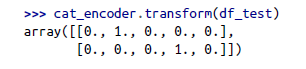

See the difference? get_dummies() saw only two categories, so it output two columns,
whereas OneHotEncoder output one column per learned category, in the right order.
Moreover, if you feed get_dummies() a DataFrame containing an unknown category
(e.g., "<2H OCEAN"), it will happily generate a column for it:

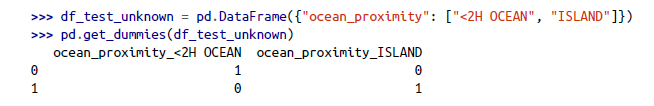

But OneHotEncoder is smarter: it will detect the unknown category and raise
an exception. If you prefer, you can set the handle_unknown hyperparameter to
"ignore", in which case it will just represent the unknown category with zeros:

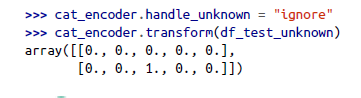

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the
column names in the feature_names_in_ attribute. Scikit-Learn then ensures that
any DataFrame fed to this estimator after that (e.g., to transform() or predict())
has the same column names. Transformers also provide a get_feature_names_out()
method that you can use to build a DataFrame around the transformer’s output:

In [55]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [56]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling

Min-max scaling (many people call this normalization) is the simplest: for each
attribute, the values are shifted and rescaled so that they end up ranging from
0 to 1. This is performed by subtracting the min value and dividing by the difference
between the min and the max. Scikit-Learn provides a transformer called
MinMaxScaler for this. It has a feature_range hyperparameter that lets you change
the range if, for some reason, you don’t want 0–1 (e.g., neural networks work best
with zero-mean inputs, so a range of –1 to 1 is preferable).

In [57]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Standardization is different: first it subtracts the mean value (so standardized values
have a zero mean), then it divides the result by the standard deviation (so standardized
values have a standard deviation equal to 1). Unlike min-max scaling, standardization
does not restrict values to a specific range. However, standardization is much
less affected by outliers. For example, suppose a district has a median income equal
to 100 (by mistake), instead of the usual 0–15. Min-max scaling to the 0–1 range
would map this outlier down to 1 and it would crush all the other values down to
0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a
transformer called StandardScaler for standardization

In [58]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

If you want to scale a sparse matrix without converting it to a dense
matrix first, you can use a StandardScaler with its with_mean
hyperparameter set to False: it will only divide the data by the
standard deviation, without subtracting the mean (as this would
break sparsity).

the
following code example shows how to scale the labels using a StandardScaler (just
like we did for inputs), then train a simple linear regression model on the resulting
scaled labels and use it to make predictions on some new data, which we transform
back to the original scale using the trained scaler’s inverse_transform() method.
Note that we convert the labels from a Pandas Series to a DataFrame, since the StandardScaler expects 2D inputs. Also, in this example we just train the model on a
single raw input feature (median income), for simplicity

In [59]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())


In [60]:
model = LinearRegression()
model.fit(housing[['median_income']], scaled_labels)
#The double square brackets [[ ]] in housing[["median_income"]] are used to select a
#DataFrame column while keeping it as a DataFrame instead of converting it into a Series.
some_new_data = housing[['median_income']].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)


In [61]:
scaled_predictions

array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [62]:
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

This works fine, but a simpler option is to use a TransformedTargetRegressor. We
just need to construct it, giving it the regression model and the label transformer,
then fit it on the training set, using the original unscaled labels. It will automatically
use the transformer to scale the labels and train the regression model on the resulting
scaled labels, just like we did previously. Then, when we want to make a prediction, it
will call the regression model’s predict() method and use the scaler’s inverse_trans
form() method to produce the prediction

In [63]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())

model.fit(housing[['median_income']], housing_labels)

predictions = model.predict(some_new_data)

In [64]:
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

Same as above

### Custom transformers

In [65]:
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['median_income']])

The inverse_func argument is optional. It lets you specify an inverse transform
function, e.g., if you plan to use your transformer in a TransformedTargetRegressor.

Custom transformers are also useful to combine features. For example, here’s a
FunctionTransformer that computes the ratio between the input features 0 and 1:

In [66]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

here’s a custom transformer that acts much like the StandardScaler:

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin
#BaseEstimator: Gives access to get_params() and set_params(), useful for hyperparameter tuning.
#TransformerMixin: Automatically adds fit_transform(), so we don’t need to define it manually.

from sklearn.utils.validation import check_array, check_is_fitted
#check_array(): Ensures that input X is a valid array (numeric, finite values).
#check_is_fitted(): Ensures the transformer has been fit() before calling transform().

In [68]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean
    #✅ Why is with_mean=True useful?
    #If True, we subtract the mean during scaling (centering the data).
    #If False, we skip mean subtraction, useful when working with sparse data

  def fit(self, X, y=None):
    X= check_array(X)
    self.mean_ = X.mean(axis=0) #we are computing the mean of each feature (column-wise mean) instead of row-wise mean.
    #axis=0 → Operates along columns (vertical direction)
    #axis=1 → Operates along rows (horizontal direction)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    #X.shape  # Returns (num_rows, num_columns)
    #X.shape[1] → Number of columns (features)
    return self


  def transform(self, X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]

    if self.with_mean:
      X = X - self.mean_

    return X/self.scale_



### 🎯 How to Use the Custom Transformer



In [69]:
import numpy as np

#sample dataset
X_train = np.array([[10,20], [30,40],[50,60]])
X_test = np.array([[20,30], [40,50]])

#create an instance of the transformer
scaler = StandardScalerClone(with_mean=True)

scaler.fit(X_train)

#transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled Training Data:\n", X_train_scaled)
print("Scaled Test Data:\n", X_test_scaled)

Scaled Training Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Scaled Test Data:
 [[-0.61237244 -0.61237244]
 [ 0.61237244  0.61237244]]


Using fit_transform

In [70]:
scaler = StandardScalerClone(with_mean=True)
X_train_scaled_over_fitTransform = scaler.fit_transform(X_train)
X_test_scaled_over_fitTransform = scaler.fit_transform(X_test)

print("Scaled Training Data:\n", X_train_scaled_over_fitTransform)
print("Scaled Test Data:\n", X_test_scaled_over_fitTransform)

Scaled Training Data:
 [[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]
Scaled Test Data:
 [[-1. -1.]
 [ 1.  1.]]


Same as above.

#### Ckuster Similarity

In [71]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma = 1.0, random_state= None):
    """
    ✅ Initializes three hyperparameters:

    n_clusters: Number of K-Means clusters.
    gamma: Controls similarity decay in rbf_kernel().
    random_state: Ensures results are consisten
    """
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state= random_state

  def fit(self, X, y=None, sample_weight=None):
    """
    ✅ What happens in fit()?

    Creates a K-Means model with n_clusters clusters.
    Fits the K-Means model to X, finding cluster centers.
    Stores the cluster centers in self.kmeans_.cluster_centers_.
    🚀 After this step, we now have learned cluster centers!
    """
    self.kmeans_=KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X, sample_weight = sample_weight)
    return self

  def transform(self, X):
    """
    ✅ What happens in transform()?

    Uses rbf_kernel() to compute how similar each data point is to each cluster center.
    The result is a new feature matrix where each column represents similarity to a specific cluster
    """
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    #rbf_kernel() computes the similarity between each row of X and each row of another dataset (e.g., cluster centers).

  def get_feature_names_out(self, names=None):
    """
    ✅ Why is this useful?

    Returns descriptive feature names for each cluster.
    Useful in pipelines when analyzing transformed data.
    """
    return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

Example Usage


In [72]:
cluster_simil = ClusterSimilarity(10, 1., 42)
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']], sample_weight = housing_labels)

In [73]:
similarities

array([[7.76542973e-17, 9.79800335e-01, 5.48714294e-08, ...,
        5.54756787e-01, 4.68660945e-14, 5.60181642e-01],
       [6.44368278e-01, 4.37928334e-13, 1.10563200e-01, ...,
        3.94562487e-17, 9.91430580e-01, 2.65430691e-10],
       [3.31752344e-17, 6.54513501e-01, 1.07069766e-08, ...,
        5.85660788e-01, 1.56121793e-14, 2.76994463e-01],
       ...,
       [1.20915228e-01, 2.94626804e-24, 8.21082019e-06, ...,
        9.05126434e-30, 2.27911432e-02, 2.57216447e-20],
       [6.54529515e-01, 2.83886458e-13, 1.06085724e-01, ...,
        2.31193217e-17, 9.95505588e-01, 1.85273211e-10],
       [2.52428219e-16, 9.68456695e-01, 1.35198859e-07, ...,
        4.42577246e-01, 1.42097447e-13, 6.51045403e-01]])

In [75]:
similarities[:3].round(2)

array([[0.  , 0.98, 0.  , 0.  , 0.  , 0.  , 0.13, 0.55, 0.  , 0.56],
       [0.64, 0.  , 0.11, 0.04, 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.  , 0.65, 0.  , 0.  , 0.01, 0.  , 0.49, 0.59, 0.  , 0.28]])